In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Fraud.csv')

In [201]:
# Delete irrelevant columns like nameOrig and nameDest
del dataset["nameOrig"]
del dataset["nameDest"]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

In [202]:
# Application of One Hot Encoding for transaction type

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder',OneHotEncoder(),[1])]  , remainder = 'passthrough' )
X = np.array(ct.fit_transform(X))

In [203]:
# Splitting into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [204]:
# Feature scaling for the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [205]:
# Classifier Models

# Linear
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

#Log
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter = len(y_train) )
classifier.fit(X_train, y_train)


#Naive Bayes - worst performance 
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

#KNN
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

#SVM
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Kernal SVM
#from sklearn.svm import SVC
#classifier = SVC(kernel = 'rbf', random_state = 0)
#classifier.fit(X_train, y_train)

#Decision Tree Classifer - second worst
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)

# Random Forest Classifier - third worst
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)


LogisticRegression(max_iter=5090096, random_state=0)

In [206]:
# summarize feature importance
#importance = classifier.coef_
#print(abs(importance))
#print()
#print(X[0,:])
#print(X[1,:])
#print(X[2,:])
#print()
y_pred = classifier.predict(X_test)

[[1270812      71]
 [    943     698]]


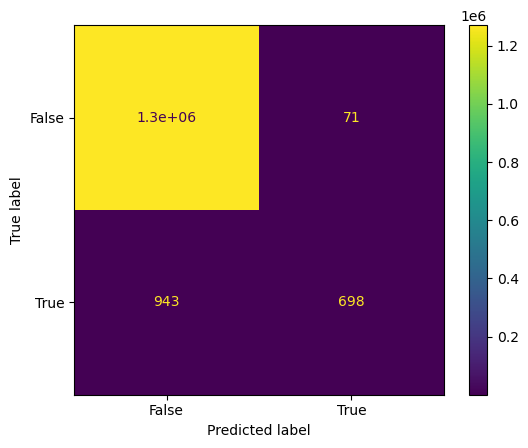

In [216]:
# Confusion Matrix and performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [208]:
# Conclusion and future predictions

In [ ]:
#1. Data cleaning including missing values, outliers and multi-collinearity.
#2. Describe your fraud detection model in elaboration.
#3. How did you select variables to be included in the model?
#4. Demonstrate the performance of the model by using best set of tools.
#5. What are the key factors that predict fraudulent customer?
#6. Do these factors make sense? If yes, How? If not, How not?
#7. What kind of prevention should be adopted while company update its infrastructure?
#8. Assuming these actions have been implemented, how would you determine if they work?